In [17]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Directory paths
DATA_DIR = 'Dataset'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in ['georges', 'no_georges']:  # Explicitly list the folder names
        label_path = os.path.join(dir, label)
        if not os.path.exists(label_path):
            print(f"Directory {label_path} does not exist.")
            continue
        for imagename in os.listdir(label_path):
            image_paths.append(os.path.join(label_path, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [4]:
# Create a single DataFrame for all data
all_images, all_labels = createdataframe(DATA_DIR)
all_data = pd.DataFrame({'image': all_images, 'label': all_labels})

georges completed
no_georges completed


In [5]:
# Ensure the dataset is stratified when split
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42, stratify=all_data['label'])

In [6]:
# Check the shapes of the DataFrames
print(f"Train DataFrame shape: {train_data.shape}")
print(f"Test DataFrame shape: {test_data.shape}")

Train DataFrame shape: (4837, 2)
Test DataFrame shape: (1210, 2)


In [7]:
# Feature extraction
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [8]:
# Extract features for training and testing datasets
# train_features = extract_features(train_data['image'])
test_features = extract_features(test_data['image'])

# Normalize the features
# x_train = train_features / 255.0
x_test = test_features / 255.0

  0%|          | 0/1210 [00:00<?, ?it/s]

In [9]:
# Label encoding
le = LabelEncoder()
le.fit(train_data['label'])
# y_train = le.transform(train_data['label'])
y_test = le.transform(test_data['label'])

# One-hot encode the labels
# y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


In [10]:

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (1210, 48, 48, 1)
y_test shape: (1210, 2)


In [12]:
# Load the model
model_path = 'models/st_george_detector.h5'  # Update this with your model's path
model = load_model(model_path)

In [14]:
# Predict on the test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

38/38 [==============================] - 11s 280ms/step


In [15]:
# Convert y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)

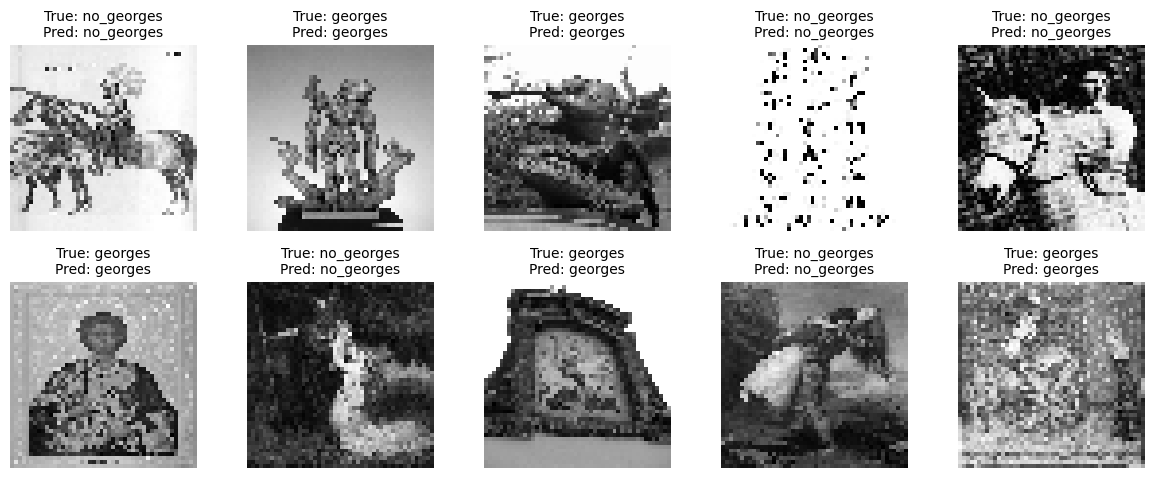

In [16]:
# Display random predictions
def display_random_predictions(x_test, y_test_labels, y_pred, le, num_images=10):
    # Randomly select indices
    indices = np.random.choice(len(x_test), size=num_images, replace=False)

    plt.figure(figsize=(12, 12))

    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_test[idx].reshape(48, 48), cmap='gray')
        true_label = le.classes_[y_test_labels[idx]]
        pred_label = le.classes_[y_pred[idx]]
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display random predictions
display_random_predictions(x_test, y_test_labels, y_pred, le, num_images=10)